In [51]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns
from IPython.display import clear_output
from keras.utils import plot_model

In [52]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import KFold  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [53]:
data=pd.read_csv('C:\\Users\\suneelnair1\\Documents\\Sunil\\Class_notes\\Kaggle_datasets\\Kaggle_datasets\\Cancer_sample_datasets\\Breast_cancer_data.csv')

In [54]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [55]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [56]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [57]:
print('Row,Col',data.shape)

Row,Col (569, 31)


In [58]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [59]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


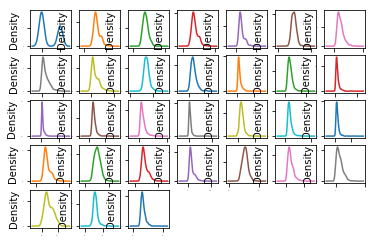

In [61]:
data.plot(kind='density',subplots=True,layout=(5,7),sharex=False,legend=False,fontsize=1)
plt.show()

diagnosis
0    357
1    212
dtype: int64


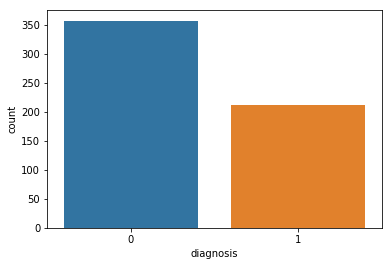

In [62]:
print(data.groupby('diagnosis').size())
sns.countplot(data['diagnosis'],label="Count")
plt.show()

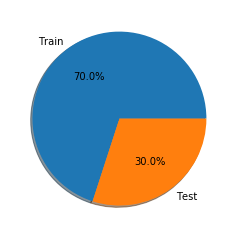

In [63]:
# Split the Dataset into Train and Test sets

traindf,testdf=train_test_split(data,test_size=0.3)
labels = 'Train', 'Test'
plt.pie([70,30],labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

In [64]:
# Shapes of Train and Test data

print('Traindf:',traindf.shape)
print('Testdf:',testdf.shape)

Traindf: (398, 31)
Testdf: (171, 31)


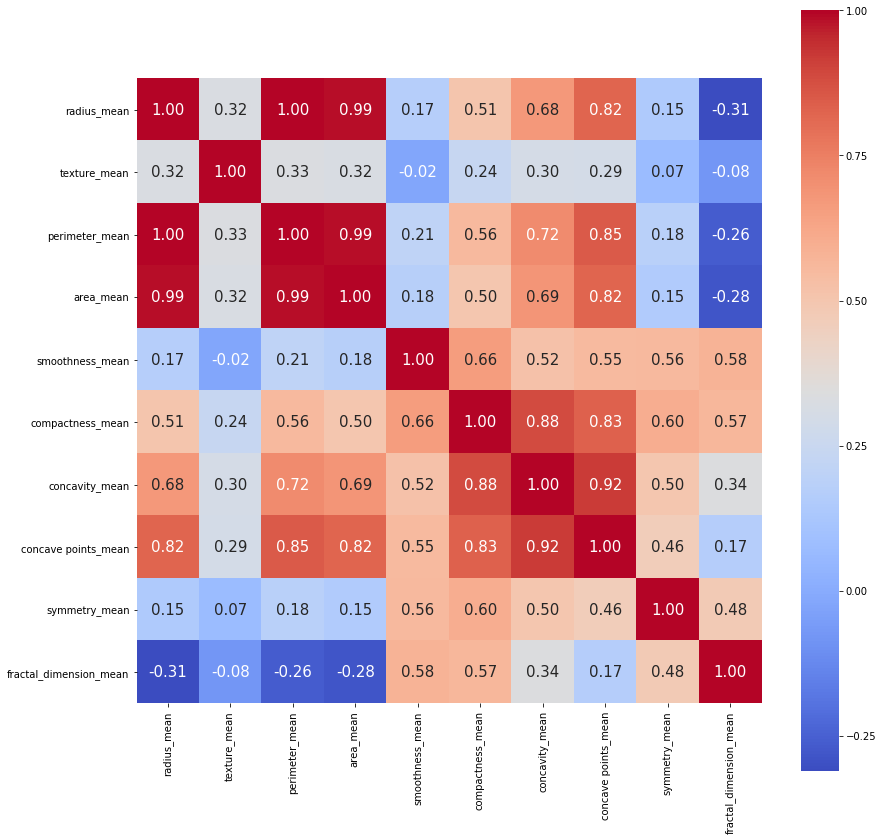

In [65]:
features_mean=list(data.columns[1:11])
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':15},xticklabels=features_mean,yticklabels=features_mean,cmap='coolwarm')
plt.show()

## Classification Models

In [66]:
# Generic function for creating a classification model and accessing the performance

Y = data['diagnosis'].values
X = data.drop('diagnosis',axis=1).values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=21)

In [71]:
from sklearn.metrics import accuracy_score

def classification_model(model,data,predictors,outcome):
    # Fit the model
    model.fit(data[predictors],data[outcome])
    
    # Make Predictions on Training data
    predictions = model.predict(data[predictors])
    
    # Print accuracy
    accuracy = accuracy_score(predictions,data[outcome])
    print('Accuracy: %s' % "{0:0.3%}".format(accuracy))
    
    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    kfold = kf.get_n_splits(X)
    #kfold = KFold(data.shape[0],n_splits=5)
    error = []
    for train, test in kfold:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])
        
        
        
    

In [72]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
outcome_var='diagnosis'

model = LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 88.945%


C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: 'int' object is not iterable

In [37]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 100.000%


TypeError: __init__() got an unexpected keyword argument 'k'

In [38]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model= KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 91.960%


TypeError: __init__() got an unexpected keyword argument 'k'

In [39]:
predictor_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
model= SVC()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy: 94.472%


C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'k'

In [50]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)
models_list = []
models_list.append(('LR', LogisticRegression()))
models_list.append(('DT', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('KNN', KNeighborsClassifier()))
num_folds = 10
results = []
names = []
for name, model in models_list:
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=num_folds, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s:(run time: %f)" % (name, end-start))

C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suneelnair1\App

LR:(run time: 0.072033)
DT:(run time: 0.055324)
SVM:(run time: 0.197286)
KNN:(run time: 0.031241)


C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\suneelnair1\AppData\Local\conda\conda\envs\neuralnets\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av